<a href="https://colab.research.google.com/github/paulaRMachado/PUC-RIO-DTSC-MVP2/blob/main/PUC_MVP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Análise de Dados e Boas Práticas**

**Nome**: Paula R A Machado

**Matrícula**: 405205000163

**Dataset**: Indian Liver Patient Records

# Descrição do Problema

O conjunto de dados *Indian Liver Patient Records* contém informações de pacientes do nordeste de Andhra Pradesh, na Índia, com o objetivo principal de prever a presença ou ausência de doenças hepáticas. Para isso, o dataset reúne medidas bioquímicas como níveis enzimáticos (ALT, AST), bilirrubina, proteínas totais, albumina, além de dados demográficos como idade e sexo. A proposta deste trabalho é investigar essas características e construir um modelo capaz de identificar precocemente pacientes que necessitam de avaliação médica especializada.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

* Pacientes com níveis elevados de bilirrubina e enzimas hepáticas (AST, ALT) têm maior probabilidade de apresentar doença hepática.

* Existe relação entre o nível de albumina e a presença da doença hepática?

* Pacientes mais velhos tendem a apresentar um risco maior para o desenvolvimento de doença hepática?

* Medidas como a proporção entre albumina e globulina são bons indicadores para diferenciar pacientes saudáveis de doentes?

## Tipo de Problema

Este é um problema de **classificação supervisionada**.

Dado um conjunto de características laboratoriais e demográficas (como níveis de bilirrubina, enzimas hepáticas, proteínas, idade e sexo), o objetivo é prever se um paciente possui doença hepática ou não. O resultado desejado é classificar cada paciente em uma das duas classes: doente ou não doente.

## Seleção de Dados

O dataset *Indian Liver Patient Records* foi obtido do repositório Kaggle e contém informações laboratoriais e demográficas de pacientes com e sem doenças hepáticas. Por se tratar de um dataset real e não-curado, foi necessário carregar o arquivo CSV bruto e inspecionar a estrutura para verificar a qualidade dos dados antes da análise. Nessa etapa inicial, todos os atributos serão utilizados, pois são potencialmente relevantes para o problema e não há necessidade de filtragem prévia de colunas.

## Atributos do Dataset

O dataset *Indian Liver Patient Records* contém 583 amostras, sendo 416 de pacientes COM doença hepática e 167 de pacientes SEM doença hepática. Há 11 atributos:

- **Age**: Idade do paciente
- **Gender**: Sexo do Paciente
- **Total Bilirubin**: Bilirrubina Total (mg/dL)
- **Direct Bilirubin**: Bilirrubina Conjugada (mg/dL)
- **Alkaline Phosphotase**: Fosfatase Alcalina (UI/L)
- **Alamine Aminotransferase**: Alanina Aminotransferase (UI/L)
- **Aspartate Aminotransferase**: Aspartato Aminotransferase (UI/L)
- **Total Protiens**: Proteínas Totais (g/dL)
- **Albumin**: Albumina (g/dL)
- **Albumin and Globulin Ratio**: Razão Albumina/Globulina (%)
- **Dataset**: Estado hepático (com doença hepática ou saudável)

#Bibliotecas necessárias e carga de dados

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [225]:
# Camada Bronze – Dados Brutos carregados diretamente do repositório
url = "https://raw.githubusercontent.com/paulaRMachado/PUC-RIO-DTSC-MVP2/refs/heads/main/indian_liver_patient.csv"
bronze = pd.read_csv(url)

In [226]:
# visualização das primeiras linhas
bronze.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#Análise de Dados

##Total e Tipo das Instâncias

In [227]:
# Informações sobre a estrutura do dataset
bronze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


O dataset contém 583 amostras e 11 atributos, sendo 10 numéricos e apenas um categórico (Gender). Todos os campos estão completos, exceto Albumin_and_Globulin_Ratio, que tem 4 valores ausentes. O alvo (Dataset) está codificado numericamente e o consumo de memória é baixo (~50 KB), facilitando o processamento.

In [228]:
# Dicionário de mapeamento
novos_nomes = {
    'Age': 'Idade',
    'Gender': 'Sexo',
    'Total_Bilirubin': 'Bilirrubina Total (mg/dL)',
    'Direct_Bilirubin': 'Bilirrubina Conjugada (mg/dL)',
    'Alkaline_Phosphotase': 'Fosfatase Alcalina (UI/L)',
    'Alamine_Aminotransferase': 'Alanina Aminotransferase (UI/L)',
    'Aspartate_Aminotransferase': 'Aspartato Aminotransferase (UI/L)',
    'Total_Protiens': 'Proteínas Totais (g/dL)',
    'Albumin': 'Albumina (g/dL)',
    'Albumin_and_Globulin_Ratio': 'Razão Albumina/Globulina (%)',
    'Dataset': 'Estado hepático'
}

# Renomear o DataFrame
bronze = bronze.rename(columns=novos_nomes)

# Agora o DataFrame bronze tem os nomes atualizados:
bronze.head()


,Idade,Sexo,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Razão Albumina/Globulina (%),Estado hepático
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


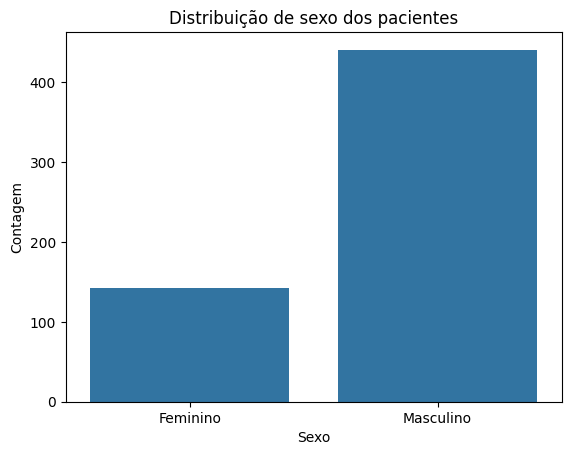

In [229]:
"""
Distribuição de pacientes quanto ao sexo
Utilizei o método map para facilitar o entendimento do gráfico uma vez que o atributo está em inglês.
"""
sns.countplot(x=bronze['Sexo'].map({'Male': 'Masculino', 'Female': 'Feminino'}))
plt.title('Distribuição de sexo dos pacientes')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()



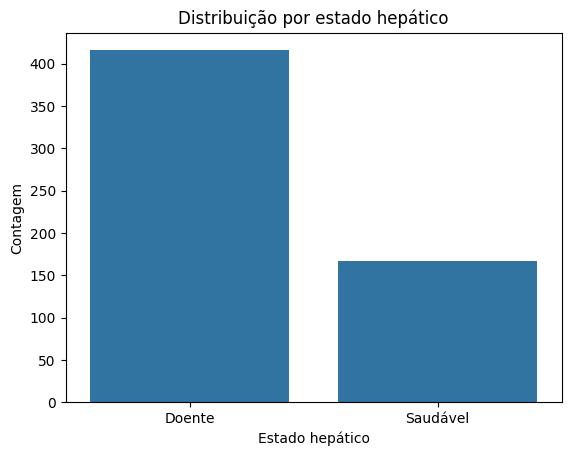

In [230]:
"""
Distribuição de pacientes quanto ao estado hepático
Utilizei o método map para facilitar o entendimento do gráfico uma vez que o atributo já está codificado numericamente.
"""
sns.countplot(x=bronze['Estado hepático'].map({1: 'Doente', 2: 'Saudável'}))
plt.title('Distribuição por estado hepático')
plt.xlabel('Estado hepático')
plt.ylabel('Contagem')
plt.show()


Texto descritivo

## Estatísticas descritivas

In [231]:
# Estatísticas dos dados numéricos
bronze.describe()

,Idade,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Razão Albumina/Globulina (%),Estado hepático
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


A maioria das variáveis parece apresentar grande variabilidade apresentando o  coeficiente de variação bem acima de 1, como **Fosfatase Alcalina**, **Alanina Aminotransferase** e **Aspartato Aminotransferase**.

Há valores máximos extremamente distantes da média em várias colunas como por exemplo, **Aspartato Aminotransferase** vai até 4.929 contra uma média de  aproximadamente 110, o que indica a presença de outliers.

Algumas variáveis têm uma distribuição assimétrica, pois a mediana é bem menor que a média, como em **Bilirrubina Total** e **Bilirrubina Conjugada**, sugerindo que poucos casos com níveis muito altos estão puxando a média para cima.



##Histogramas

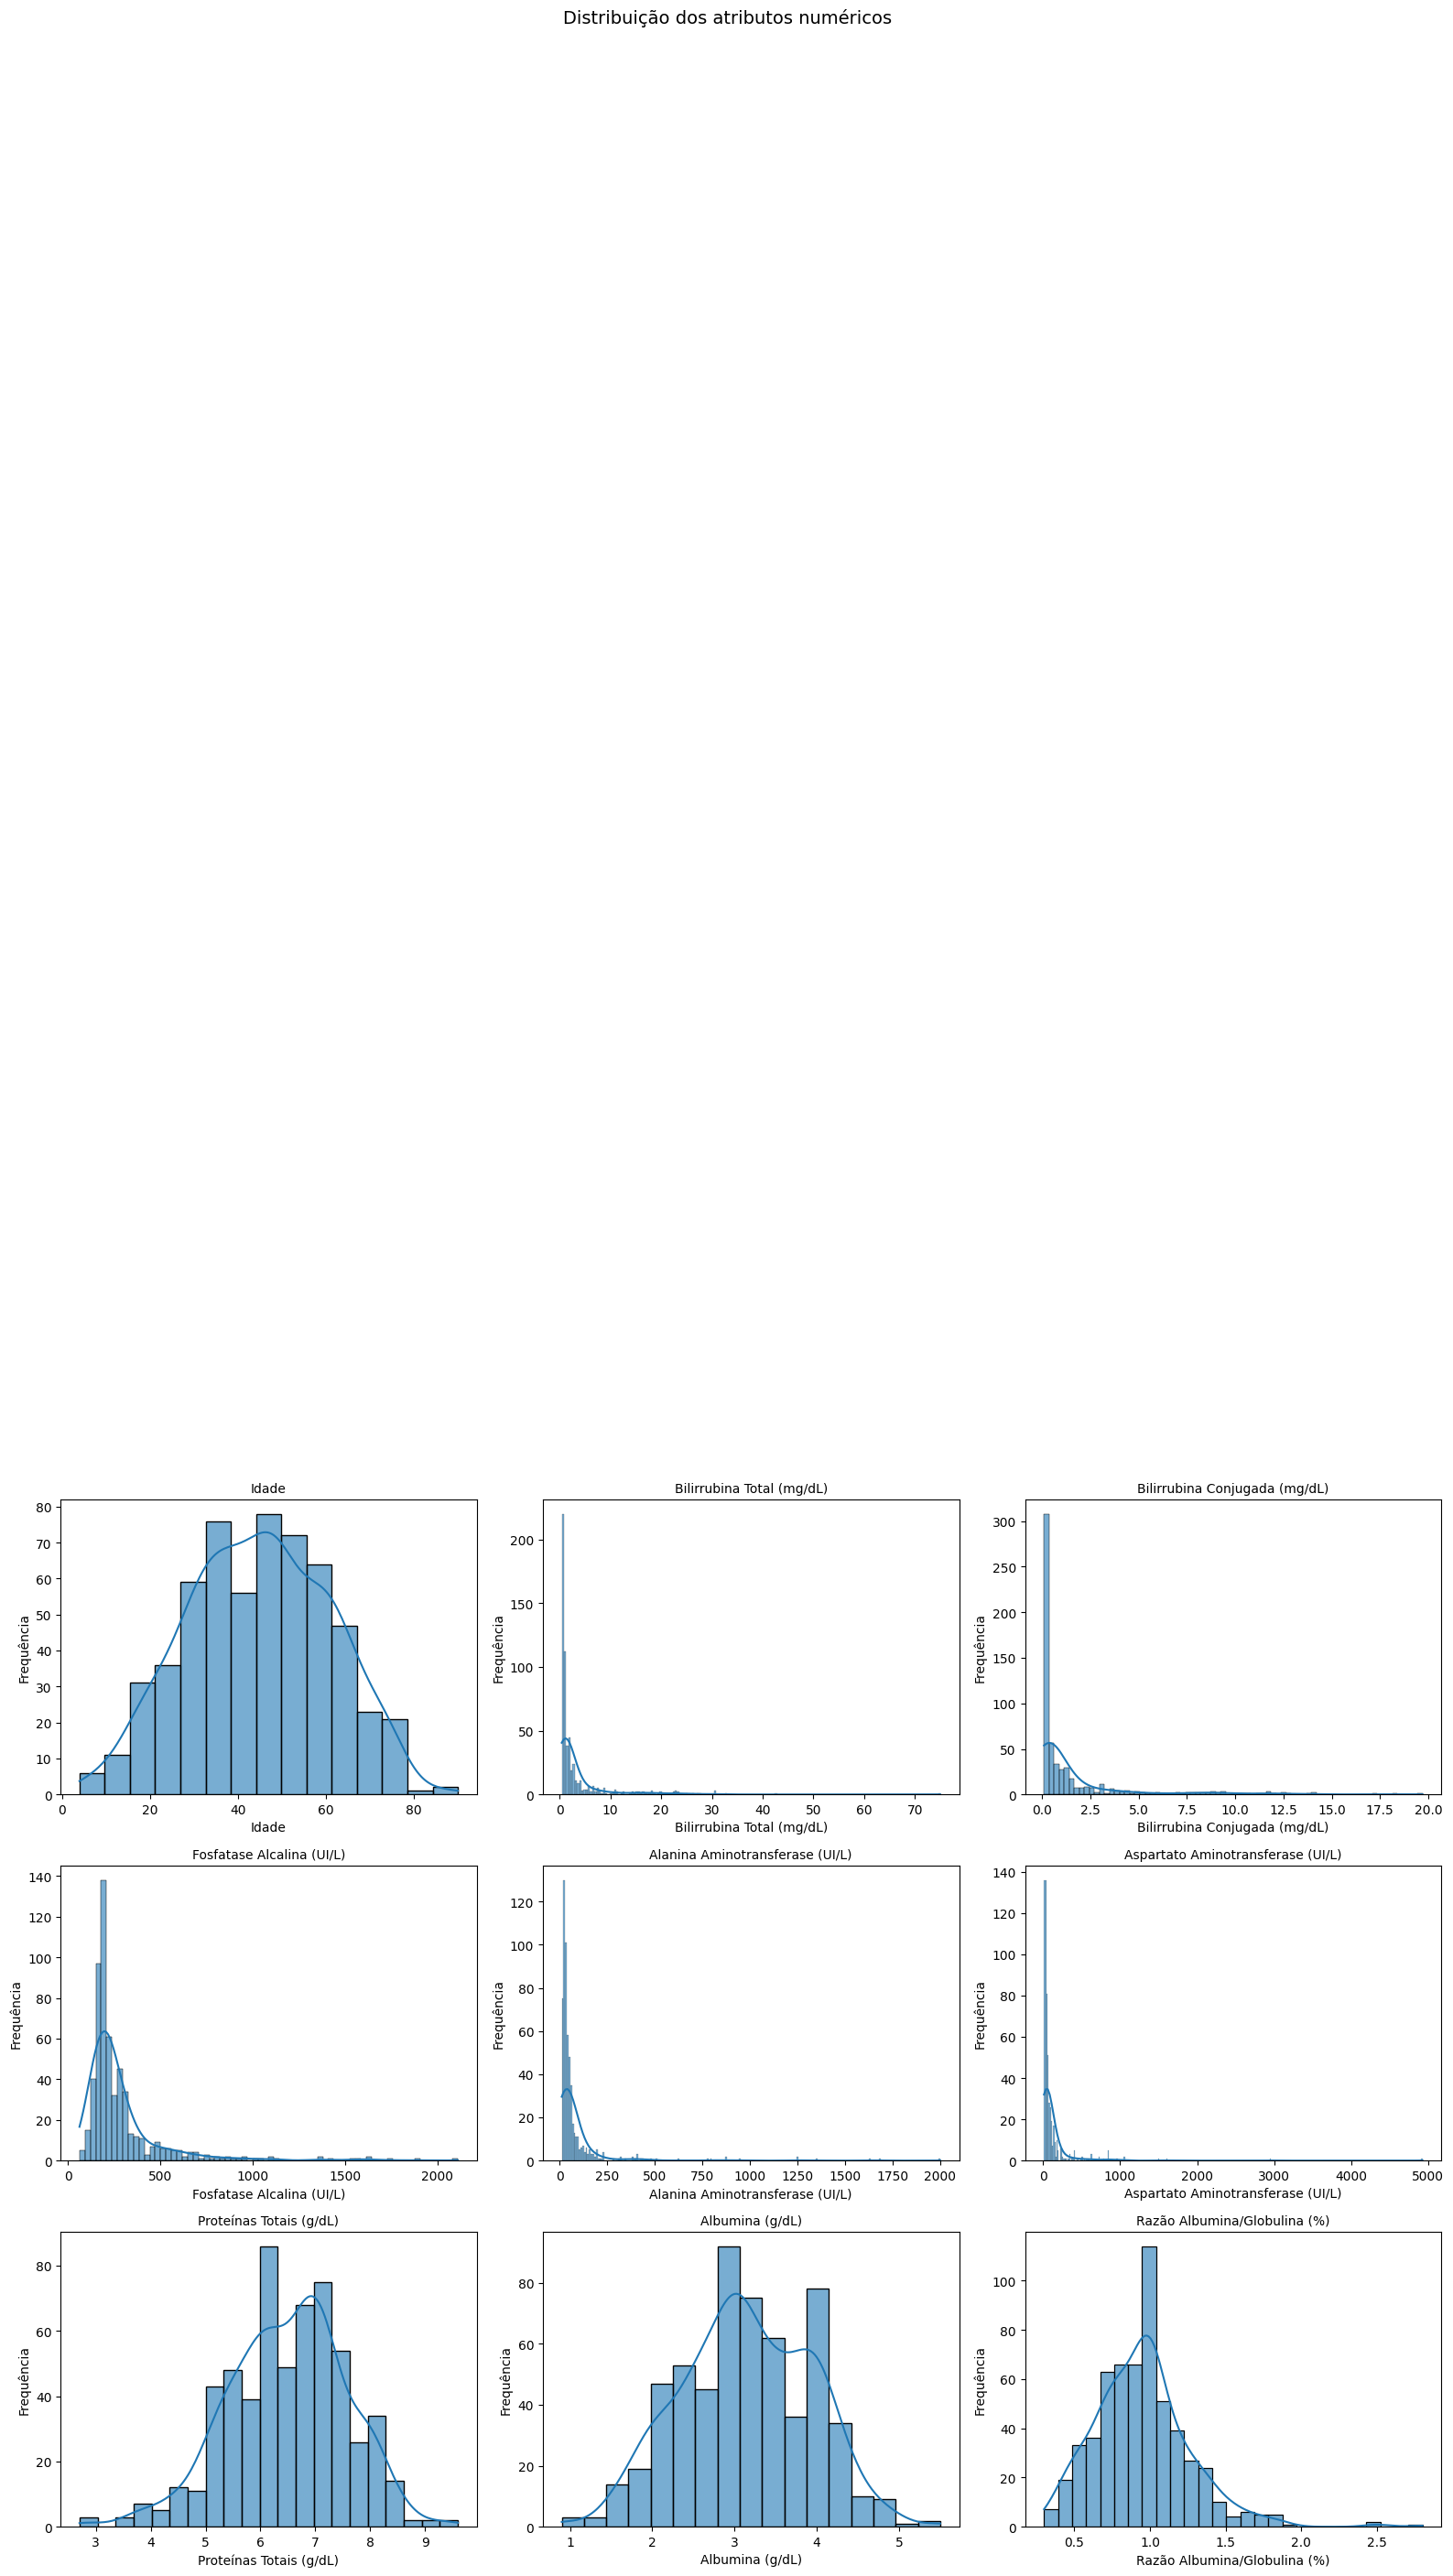

In [232]:
# Mapeando os valores numéricos para facilitar a leitura dos gráficos
bronze['Estado hepático'] = bronze['Estado hepático'].map({1: 'Doente', 2: 'Saudável'})

# Selecionando apenas colunas numéricas exceto Dataset
bronze_numbers = bronze.select_dtypes(include=['int64', 'float64'])

# Calcula o número de linhas da grade automaticamente
num_cols = len(bronze_numbers)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(16, 4 * num_rows))

for i, col in enumerate(bronze_numbers, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(
        data=bronze,
        x=col,
        kde=True,               # Sobrepor uma curva de densidade
        alpha=0.6
    )
    plt.title(col, fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.suptitle('Distribuição dos atributos numéricos', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

##Boxplot

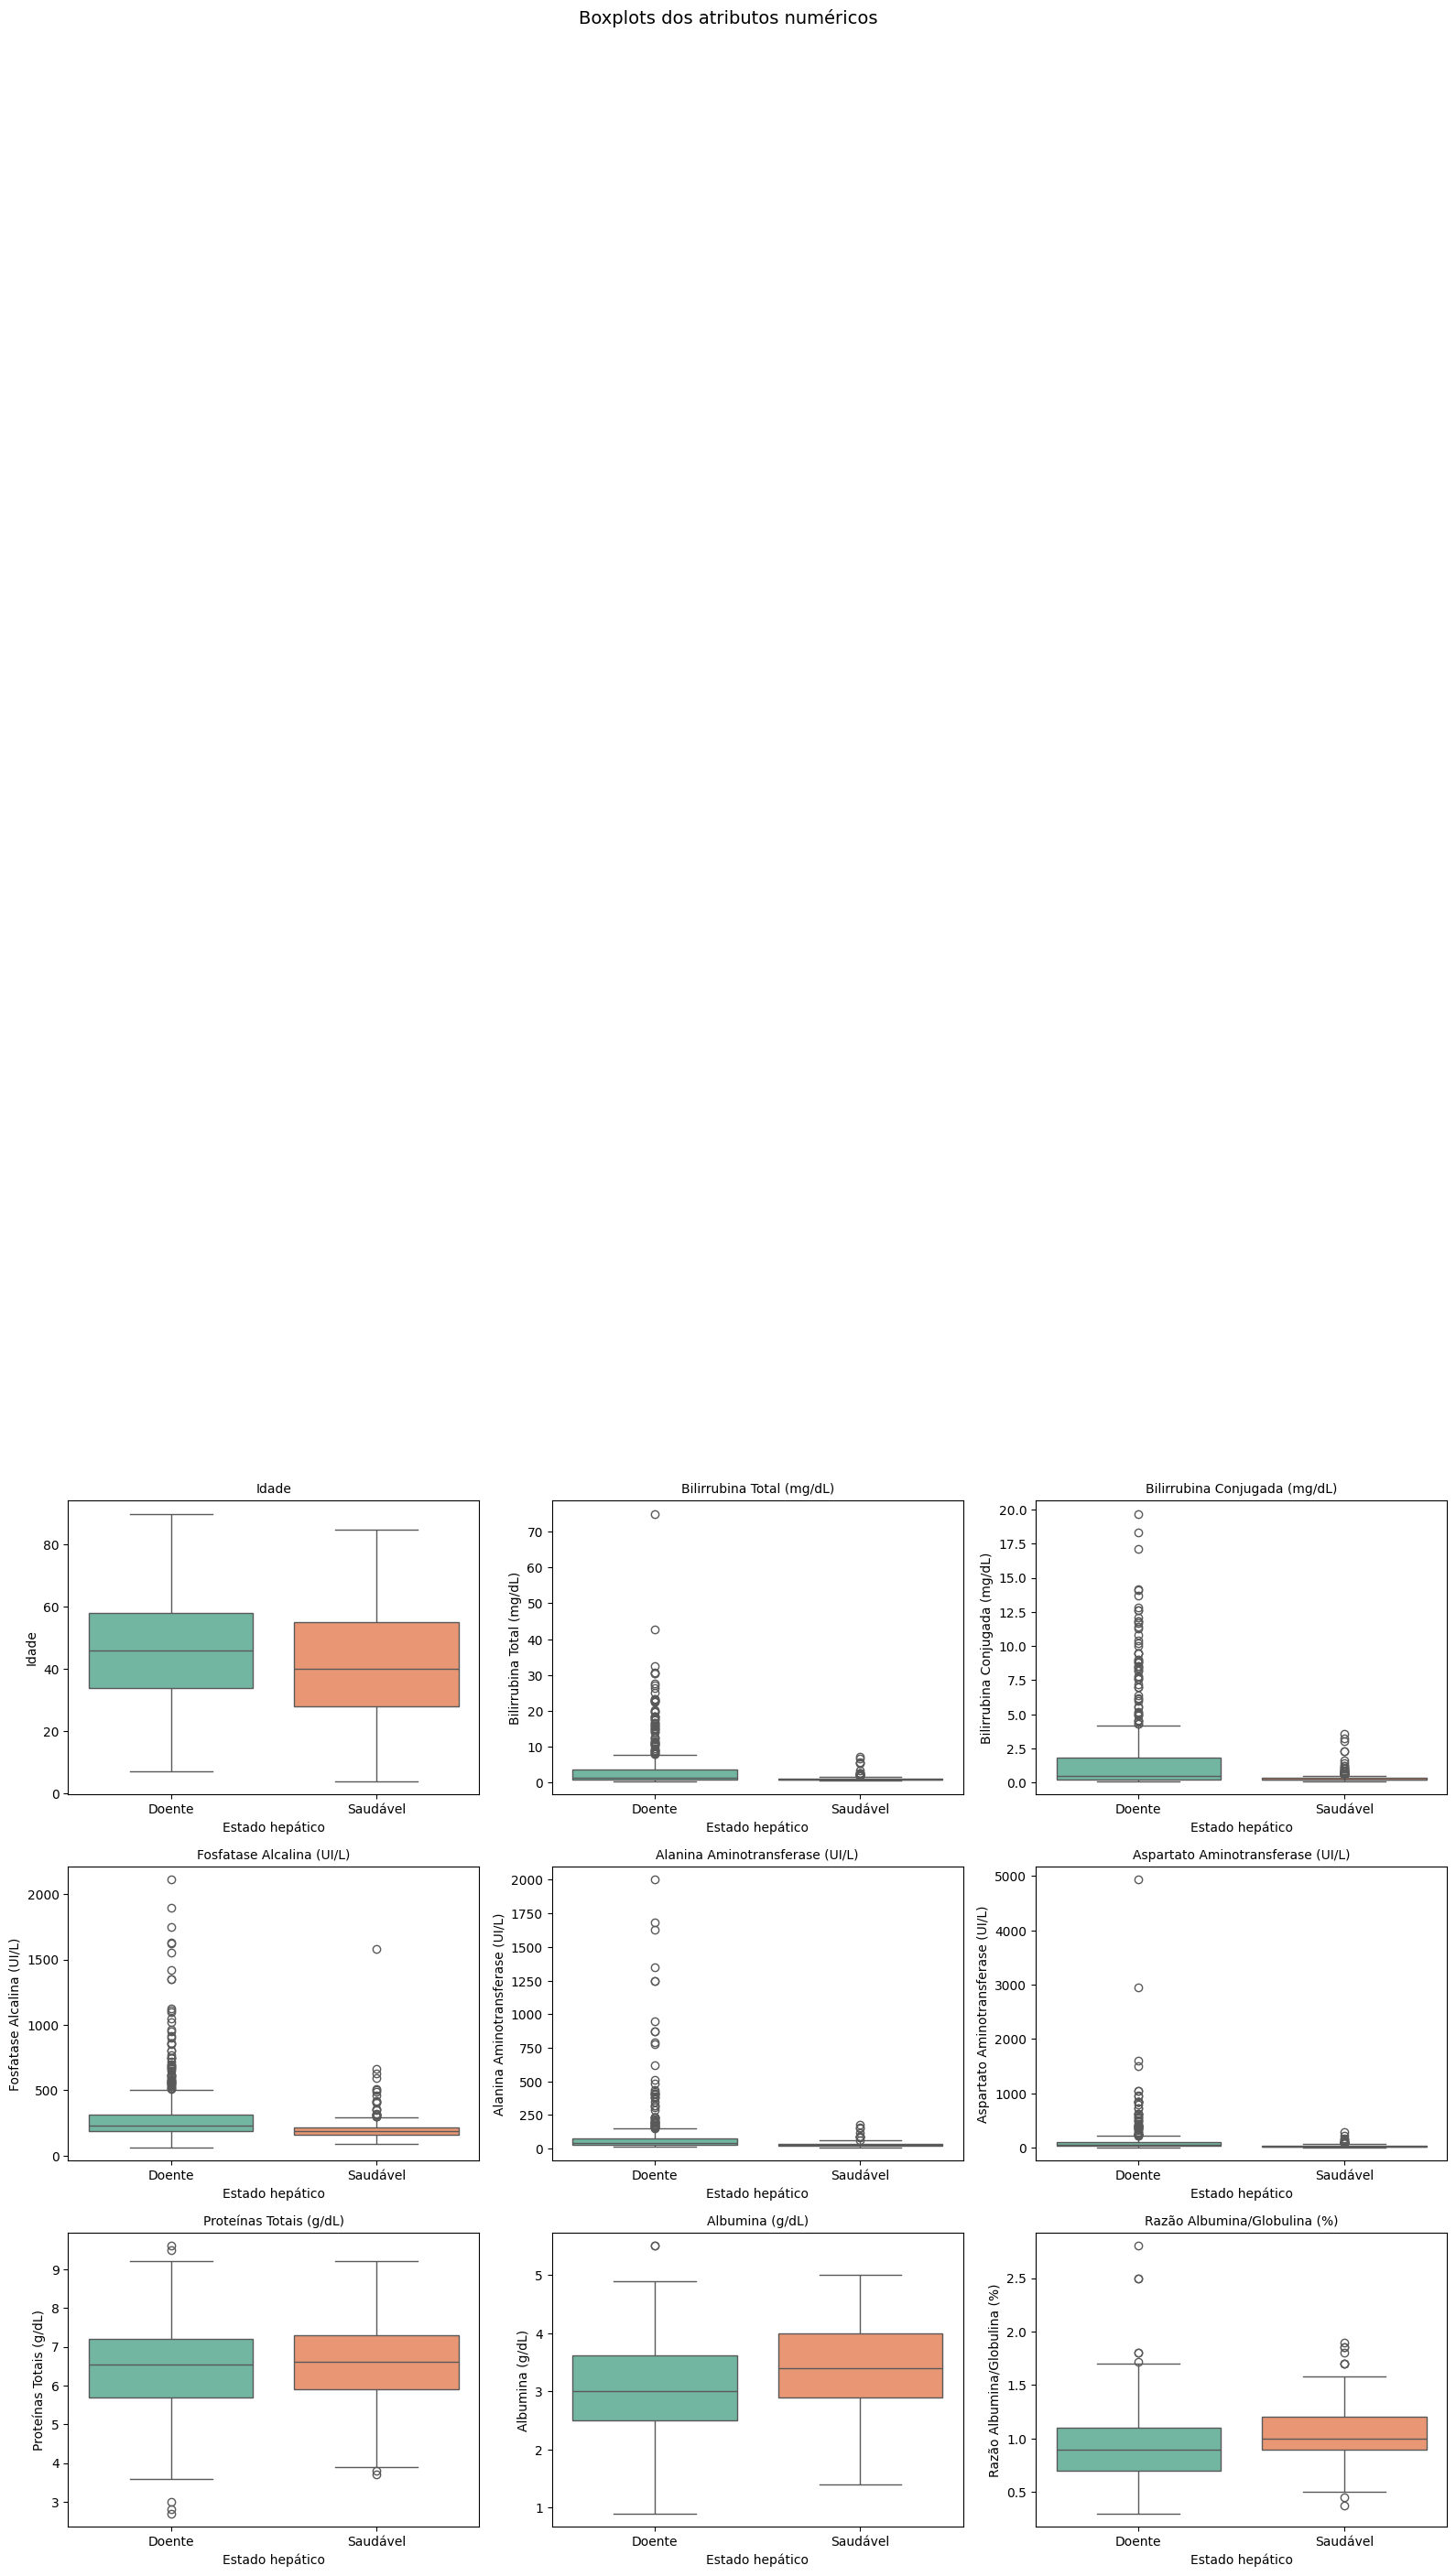

In [233]:
plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(bronze_numbers, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(
        data=bronze,
        x='Estado hepático',
        y=col,
        hue='Estado hepático', palette='Set2',
        legend=False)
    plt.title(col, fontsize=10)

plt.suptitle('Boxplots dos atributos numéricos', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


Optei por plotar os gráficos separando por estado hepático para entender se os outliers seriam decorrentes de doente hepática aguda ou não.

## Correlação

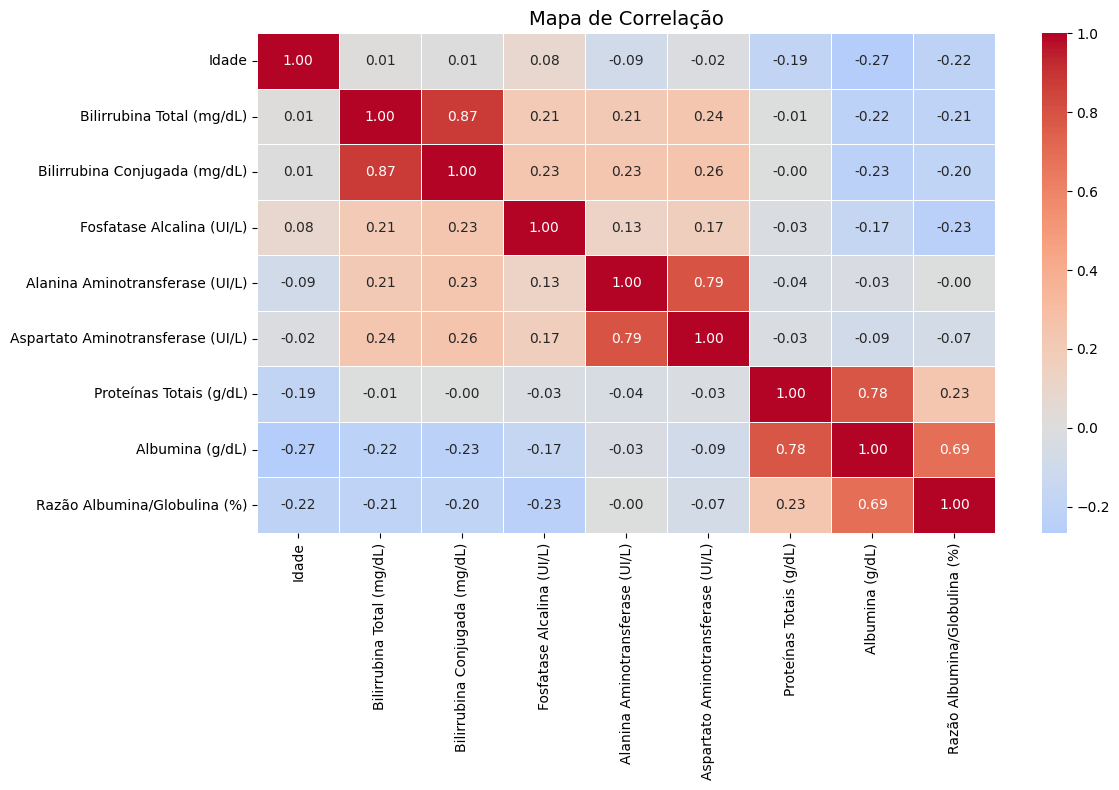

In [234]:
# Seleciona apenas colunas numéricas da camada bronze
bronze_numeric = bronze.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
correlation_matrix = bronze_numeric.corr()
plt.figure(figsize=(12, 8))
# Cria o mapa de calor com anotações
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)


# Título
plt.title('Mapa de Correlação', fontsize=14)
plt.tight_layout()
plt.show()


Observa-se forte correlação, em 4 pontos da matriz entre:
* Bilirrubina Total e Bilirrubina Conjugada, com *0.87*;
* Alanina Aminotransferase e Aspartato Aminotransferase, com *0.79*;
* Proteínas Totais e Albimuna, com *0.78*;
* Albumina e Razão Albumina/Globulina, com *0.69*.

Visto que o Proteínas Totais é composto por Albumina + Globulina, será importante tratar essa relação.
O mesmo se aplica a relação de Bilirrubina total e conjugada, sendo uma parte da composição da outra.

##Tratamento de Valores Nulos

In [235]:
# Remoção de possiveis dados duplicados e amostras sem dados para Albumin_and_Globulin_Ratio
bronze.drop_duplicates()
bronze.dropna()

,Idade,Sexo,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Razão Albumina/Globulina (%),Estado hepático
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Doente
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Doente
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Doente
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Doente
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Doente
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,Saudável
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,Doente
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,Doente
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,Doente


#Pré-processamento

In [236]:
# Camada Silver – Dados limpos e pré-processados
silver = bronze
silver.head()

,Idade,Sexo,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Razão Albumina/Globulina (%),Estado hepático
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Doente
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Doente
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Doente
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Doente
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Doente


Devido à alta correlação observada entre as variáveis Albumina (g/dL) e Razão Albumina/Globulina (%), foi criada uma nova coluna denominada **Globulina** (g/dL), a partir da relação matemática entre essas variáveis, onde: Razão = Albumina / Globulina. A substituição da razão por essa nova variável visa reduzir a multicolinearidade e aumentar a eficiência dos modelos preditivos, proporcionando ao modelo uma variável adicional com significado clínico direto, o que pode favorecer a aprendizagem de padrões mais robustos na classificação do estado hepático dos pacientes.

In [237]:
# Criação do atributo Globulina a partir de Razão Albumina/Globulina (%)
silver['globulina'] = silver['Albumina (g/dL)']/silver['Razão Albumina/Globulina (%)']


In [238]:
# Ajustar e transformar as colunas Sexo e Estado hepático
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded = encoder.fit_transform(silver[['Sexo']])
silver['Sexo_encoded'] = encoded.astype(int)

encoded = encoder.fit_transform(silver[['Estado hepático']])
silver['Estado_encoded'] = encoded.astype(int)


In [239]:
silver = silver.drop(columns=['Razão Albumina/Globulina (%)','Sexo'])

In [240]:
silver.head()

,Idade,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Estado hepático,globulina,Sexo_encoded,Estado_encoded
0,65,0.7,0.1,187,16,18,6.8,3.3,Doente,3.666667,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,Doente,4.324324,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,Doente,3.707865,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,Doente,3.400000,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,Doente,6.000000,1,0


In [241]:
# Separar features (X) e target (y)
X = silver.drop('Estado hepático', axis=1)
y = silver['Estado hepático']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Como há um desbalanceamento entre os estados hepáticos (existem mais indivíduos doentes do que saudáveis) foi aplicado o **oversampling** com **SMOTE** para ajustar o desbalanceamento e melhora a capacidade do modelo de identificar corretamente ambas as classes, especialmente a minoritária. Isso torna o sistema preditivo mais justo, sensível e útil na prática clínica.

In [243]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(f"Dimensões de X_train_res: {X_train_res.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train_res: {y_train_res.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Estatísticas descritivas:

Quantos atributos e instâncias existem?
Quais são os tipos de dados dos atributos?
Verifique as primeiras linhas do dataset. Algo chama a atenção?
Há valores faltantes, discrepantes ou inconsistentes?
Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?
Visualizações:

Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).
Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.

Requisitos e composição da nota:
* (2,0 pts) Documentação consistente:utilize blocos de texto que expliquem textualmente cada etapa e cada decisão do seu código, contando uma história completa e compreensível, do início ao fim.
* (1,0 pt) Código limpo:seu código deve estar legível e organizado. Devem ser utilizadas as boas práticas de codificação vistas nas disciplinas Programação orientada a objetose Engenharia de software para ciência de dados, mas não é necessário que você crie classes no seu código.
* (2,0 pts) Análise de dados:após cada gráfico, você deverá escrever um parágrafo resumindo os principais achados, analisando os resultados e levantando eventuais pontos de atenção.



# Conclusão

####Pacientes com níveis elevados de bilirrubina e enzimas hepáticas (AST, ALT) têm maior probabilidade de apresentar doença hepática?


In [ ]:
plt.figure(figsize=(12, 5))

# Total Bilirubin vs AST
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=silver,
    x='Bilirrubina Total (mg/dL)', y='Aspartato Aminotransferase (UI/L)	',
    hue='Estado hepático', palette='Set2'
)
plt.title('Bilirrubina Total x AST')

# Total Bilirubin vs ALT
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=silver,
    x='Bilirrubina Total (mg/dL)', y='Alanina Aminotransferase (UI/L)',
    hue='Estado hepático', palette='Set2'
)
plt.title('Bilirrubina Total x ALT')

plt.tight_layout()
plt.show()

De acordo com a visualização dos gráficos de dispersão, há uma relação clara entre níveis mais elevados de bilirrubina (total) e as enzimas hepáticas (AST e ALT) e a probabilidade do paciente estar doente. Há maior concentração de pontos "Doente" quando tanto a Bilirrubina Total quanto as enzimas estão elevadas — especialmente o grupo com valores mais extremos de bilirrubina e enzimas hepáticas. Enquanto pacientes saudáveis estão concentrados na parte inferior esquerda do gráfico.

#### Existe relação entre o nível de albumina e a presença da doença hepática?


In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=bronze,
    x='Estado hepático',
    y='Albumin',
    hue='Estado hepático',
    palette='Set2',
    legend=False
)
plt.title('Distribuição da Albumina por Estado Hepático')
plt.ylabel('Albumina (g/dL)')
plt.xlabel('Estado Hepático')
plt.show()

####Pacientes mais velhos tendem a apresentar um risco maior para o desenvolvimento de doença hepática?

#### Medidas como a proporção entre albumina e globulina são bons indicadores para diferenciar pacientes saudáveis de doentes?